In [46]:
pipe=Pipeline([('ore',ore()),('Normalizer',Normalizer()),('Ridge',Ridge())])


In [47]:
pipe.fit(X,y)
y_pred_norm=pipe.predict(X)
y_pred=denormalize(y_pred_norm)
mse = mean_squared_error(y, y_pred)
print("MSE Score: ",mse)
rs=r2_score(y,y_pred)
print("R^2 Score: ",rs)
enc=ore()

X1=enc.fit_transform(X)

encoded_df = pd.DataFrame(X1,columns=enc.get_feature_names_out(X.columns))

nc,ps,zs=significance_hypothesis_test(encoded_df,y,y_pred,pipe.named_steps['Ridge'].coef_)
print(sorted(nc))
print(ps)
print(zs)


MSE Score:  6.814785666682278
R^2 Score:  0.0004700582149368415
[(0.7050592034445631, 'avg_Grade')]
[3.5822934019246255e-39]
[13.093597711584877]


In [48]:
def denormalize(y):#this is a denormalize function
    u=np.mean(df['G3'])
    sigma=np.std(df['G3'])
    for i in y:
        i=i*sigma+u
    return y

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import warnings
import scipy.stats as stats
# Ignore warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder as ore

In [50]:
df = pd.read_csv("cleaned_df.csv")

In [51]:

X = df.drop(columns=["G3"])
y = df['G3']


# Model Building

## First we will define our features and our target

In [52]:
def significance_hypothesis_test(X,y_train,y_pred,coeff):
    N=len(y_train)
    numerator=np.sqrt(mean_squared_error(y_train,y_pred)*(N/(N-2)))
    SE=[]
   
    cols=X.columns.copy()
    for column in cols:
        denomenator=np.sqrt(np.std(X[column])*N)
        SE.append(numerator/denomenator)
    Z_score=[]
    p_score=[]
    new_coeff=[]


    for i in range(len(coeff)):
        Z_score.append(coeff[i]/SE[i])
        p_score.append(2*stats.norm.cdf(-abs(Z_score[i])))
        if(p_score[i]<0.05):
            new_coeff.append((coeff[i],X.columns[i]))
        else:
            new_coeff.append((0,X.columns[i]))
    return new_coeff,p_score,Z_score
    

import matplotlib.pyplot as plt

    # def plot_coefficient_significance(coefficients, p_values):
    #     # print(coefficients,p_values)
    #     fig, ax = plt.subplots()
    #     ax.barh(range(len(coefficients)), p_values, color='skyblue')
    #     ax.set_yticks(range(len(coefficients)))
    #     ax.set_yticklabels([coeff[1] for coeff in coefficients])
    #     ax.invert_yaxis()  # Invert y-axis to have the highest coefficient at the top
    #     ax.set_xlabel('p-value')
    #     ax.set_title('Significance of Coefficients')
    #     plt.show()
pipe=Pipeline([('ore',ore()),('Normalizer',Normalizer()),('Ridge',Ridge())])

pipe.fit(X,y)
y_pred_norm=pipe.predict(X)
y_pred=denormalize(y_pred_norm)
mse = mean_squared_error(y, y_pred)
print("MSE Score: ",mse)
rs=r2_score(y,y_pred)
print("R^2 Score: ",rs)
enc=ore()

X1=enc.fit_transform(X)

encoded_df = pd.DataFrame(X1,columns=enc.get_feature_names_out(X.columns))

# nc,ps,zs=significance_hypothesis_test(encoded_df,y,y_pred,pipe.named_steps['Ridge'].coef_)
# print(sorted(nc))
# print(ps)
# print(zs)
print("Started")
coefficients, p_values,_ = significance_hypothesis_test(encoded_df,y,y_pred,pipe.named_steps['Ridge'].coef_)
#plot_coefficient_significance(coefficients, p_values)
    

MSE Score:  1.9372166794863541
R^2 Score:  0.7158669150317205
Started


In [53]:
df = pd.read_csv("cleaned_df.csv")

Here we tried Ridge regression with cross 

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
alphas = [0,0.1, 1.0, 10.0]
mean_cv_scores = []
for alpha in alphas:
    # Define the pipeline with Ridge Regression
    pipeline = Pipeline([
        ('ore',ore()),
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
        # Define K-Fold Cross-Validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform K-Fold Cross-Validation
    cv_scores = cross_val_score(pipeline, X, y, cv=kfold)
    mean_cv_score = np.mean(cv_scores)
    mean_cv_scores.append(mean_cv_score)
best_alpha = alphas[np.argmax(mean_cv_scores)]
pipe=Pipeline([('ore',ore()),('Normalizer',Normalizer()),('Ridge',Ridge(alpha=best_alpha))])
pipe.fit(X,y)
y_pred_norm=pipe.predict(X)
y_pred=denormalize(y_pred_norm)
mse = mean_squared_error(y, y_pred)
print("MSE Score: ",mse)
rs=r2_score(y,y_pred)
print("R^2 Score: ",rs)


MSE Score:  1.6762269005770825
R^2 Score:  0.7541464899558549


Here we tried only linear regression with the feature we made from previous grades

In [57]:
X=df[['avg_Grade']]
y=df['G3']
x_train, x_test, y_train, y_test = train_test_split(X, y ,random_state = 104, train_size=0.8, shuffle=True) 

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
# Calculate mean and standard deviation of MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean MSE: {:.2f}".format(mse))
print("Mean R^2: {:.2f}".format(r2))


y_pred_train = model.predict(x_train)
train_r2 = r2_score(y_train, y_pred_train)
print("Train R^2 Score:", train_r2)

# Evaluate the best model on the test set
y_pred_test = model.predict(x_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Test R^2 Score:", test_r2)
nc,ps,zs=significance_hypothesis_test(X,y_test,y_pred,model.coef_)
print(nc)
print(ps)
print(zs)


Mean MSE: 0.93
Mean R^2: 0.88
Train R^2 Score: 0.8775947730876035
Test R^2 Score: 0.8791414363302177
[(0.9438224181412738, 'avg_Grade')]
[4.440419873752014e-50]
[14.880068898777415]


Trying Linear Regression with encoding categorical variables

In [ ]:
l = []
cat = []

for i in df:
    if (type(df[i][0]) != str):
        l.append(i)
    else:
        cat.append(i)
        
l.remove("G3")
x = df[l].copy()
cat = df[cat].copy() # cat is df

for i in cat:
    unique = cat[i].unique()
    uniqueDict = dict()
      
    for c in range(len(unique)):
        uniqueDict[unique[c]] = c
        
    cat[i] = cat[i].apply(lambda j: uniqueDict[j])
        
    # for j in cat[i].keys():
    #     cat.loc[j, i] = uniqueDict[cat[i][j]]
        
    cat[i] = cat[i].astype("int64")
    x[i] = cat[i].copy()

for i in x:
    u = np.mean(x[i])
    sigma = np.std(x[i])
    x[i] = (x[i] - u) / sigma

y = df["G3"].copy()

for i in y.keys():
    u = np.mean(y)
    sigma = np.std(y)
    y[i] = (y[i] - u) / sigma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,random_state = 104, train_size=0.8, shuffle=True) 

regr = LinearRegression(fit_intercept = True)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print("MSE Score: ",mean_squared_error(y_test, y_pred))

y_pred_train = regr.predict(x_train)
train_r2 = r2_score(y_train, y_pred_train)
print("Train R^2 Score:", train_r2)

# Evaluate the best model on the test set
y_pred_test = regr.predict(x_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Test R^2 Score:", test_r2)


Here we selected the columns with the highest correlation with the target and the rejected column from our hypothesis testing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder  as ore
from sklearn.preprocessing import OneHotEncoder  as ohe
df_copy = df.copy()
binary_encoder = LabelEncoder()
# These are the columns affecting the target from our hypothesis testing
columns = ['school', 'sex', 'address', 'schoolsup', 'higher', 'internet']
for col in columns:
    df_copy[f'{col}2'] = binary_encoder.fit_transform(df[f'{col}'])
df_copy.head()

In [ ]:
df_copy = df.copy()
binary_encoder = LabelEncoder()
# These are the columns affecting the target from our hypothesis testing
columns = ['school', 'sex', 'address', 'schoolsup', 'higher', 'internet']
for col in columns:
    df_copy[f'{col}2'] = binary_encoder.fit_transform(df[f'{col}'])
df_copy.head()
columns2=[f"{c}2"for c in columns]
# These features have strong correlation with our targeet variable
columns2.extend(['avg_Grade',"Dalc","failures","Medu","studytime"])
columns2

Applying Grid search to test different parameters for our ridge model

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = df_copy[columns2]
y = df_copy['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

y_pred_train = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_pred_train)
print("Train R^2 Score:", train_r2)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Test R^2 Score:", test_r2)
nc,ps,zs=significance_hypothesis_test(X,y_test,y_pred,best_model.coef_)
print(nc)
print(ps)
print(zs)


Trying KNeighborsRegressor with Grid search to find the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Assuming df_copy contains your DataFrame and columns2 are the features
X = df_copy[columns2]
y = df_copy['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN Regressor model
model = KNeighborsRegressor()

# Define hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and best MSE score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)


In [ ]:
y_pred_train = best_model.predict(X_train)
train_r2 = r2_score(y_train, y_pred_train)
print("Train R^2 Score:", train_r2)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Test R^2 Score:", test_r2)


In [61]:
pip install shap xgboost

   ---------------------------------------- 0.0/455.7 kB ? eta -:--:--
   -- ------------------------------------- 30.7/455.7 kB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 81.9/455.7 kB 1.1 MB/s eta 0:00:01
   ----------------- ---------------------- 194.6/455.7 kB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 256.0/455.7 kB 1.6 MB/s eta 0:00:01
   -------------------------- ------------- 307.2/455.7 kB 1.7 MB/s eta 0:00:01
   -------------------------------- ------- 368.6/455.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 389.1/455.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  450.6/455.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 455.7/455.7 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
numerical_columns = df.select_dtypes(include=['int64','Float64'])


In [ ]:
X = numerical_columns.drop(columns=["G3"])
y = numerical_columns["G3"]

In [ ]:
X = df_copy[columns2]
y = df_copy['G3']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Trying Ensemblle Learning boosting techniqe called Xgboost with hyperparameter tuning and Kfold cross validation

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error


# Define the XGBoost regressor
model = xgb.XGBRegressor()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform cross-validation with hyperparameter tuning
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, scoring='neg_mean_squared_error', cv=kfold, verbose=1, random_state=42)

# Fit the model
random_search.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)

# Print the mean squared error of the best estimator
print("Best MSE:", -random_search.best_score_)

# You can also access the best estimator directly
best_model = random_search.best_estimator_


Using the parameters from our best model

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(
   n_estimators=100,  
   max_depth=5,       
   learning_rate=0.1, 
   subsample=0.8,     
   colsample_bytree=0.8, 
   random_state=42    
)

# Use a list to store scores
mse_scores = []
r2_scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate mean and standard deviation of MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean MSE: {:.2f}".format(mse))
print("Mean R^2: {:.2f}".format(r2))


y_pred_train = model.predict(X_train)
train_r2 = r2_score(y_train, y_pred_train)
print("Train R^2 Score:", train_r2)

# Evaluate the best model on the test set
y_pred_test = model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Test R^2 Score:", test_r2)


The final model appears to be overfitting the training data

Mean MSE: 0.84
Mean R^2: 0.89
Train R^2 Score: 0.8867672403219766
Test R^2 Score: 0.8886614243884502


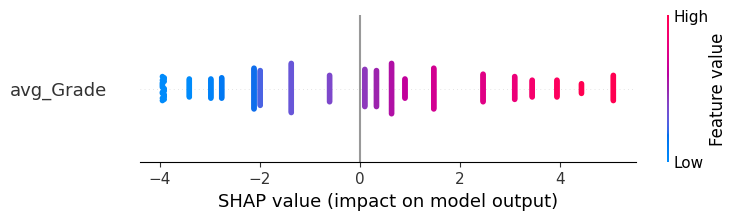

In [65]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import shap
# Initialize XGBoost Regressor
model = xgb.XGBRegressor(
   n_estimators=100,  
   max_depth=3,       
   learning_rate=0.1, 
   subsample=0.9,    
   reg_alpha=5, 
   reg_lambda=5,
   colsample_bytree=0.7, 
   random_state=42    
)

# Use a list to store scores
mse_scores = []
r2_scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate mean and standard deviation of MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean MSE: {:.2f}".format(mse))
print("Mean R^2: {:.2f}".format(r2))


y_pred_train = model.predict(X_train)
train_r2 = r2_score(y_train, y_pred_train)
print("Train R^2 Score:", train_r2)

# Evaluate the best model on the test set
y_pred_test = model.predict(X_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Test R^2 Score:", test_r2)

explainer = shap.Explainer(model,X)
shap_values= explainer(X)
shap.plots.beeswarm(shap_values)


After  adding reguralization the overfitting is much less